In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [19]:
def plot(data_dir, title, iterations=range(100, 800, 100)):

    data = np.loadtxt(data_dir + 'advection_00000.d').transpose()
    plt.plot(data[1], data[2], label='n=0')

    for i in iterations:
        data = np.loadtxt(data_dir + 'advection_%05d.d'%i).transpose()
        plt.plot(data[1], data[2], label='n=%d'%i)

    plt.xlabel('x');
    plt.ylabel('u(x)');
    plt.title(title)
    plt.legend()


### Lax-Wendroff method

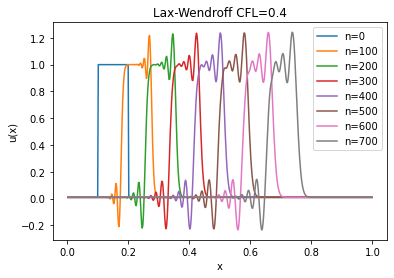

In [20]:
plot(
    data_dir='Lax-Wendroff/',
    title='Lax-Wendroff CFL=0.4'
)

### LW gaussian N=500

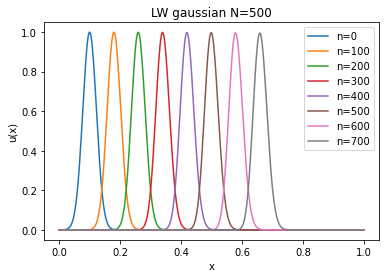

In [21]:
plot(
    data_dir='LW_gaussian/N500/',
    title='LW gaussian N=500'
)

### LF gaussian N=500

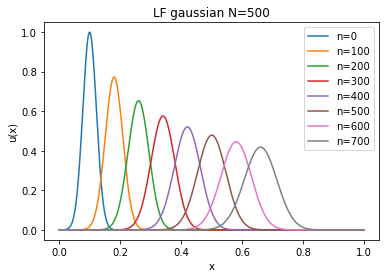

In [22]:
plot(
    data_dir='LF_gaussian/N500/',
    title='LF gaussian N=500'
)

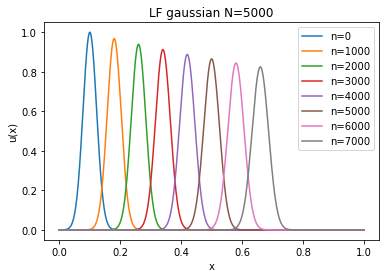

In [23]:
plot(
    data_dir='LF_gaussian/N5000/',
    title='LF gaussian N=5000',
    iterations=range(1000,8000,1000)
)

### The error of the solution at t=0.8

In [59]:
def get_anal_solu(
        c    = 1. ,
        xmin = 0. ,
        xmax = 1. ,
        imax = 50 ,
        CFL  = 0.4,
        ith_iteration = 100,
    ):

    
    dx  = (xmax-xmin)/imax
    dt  = CFL*dx/c

    # The simulation time
    t = dt * ith_iteration

    # Calculate the analytical solution
    x      = np.linspace(dx/2, 1-dx/2, imax)
    u_anal = np.exp(-1000*(x-0.1-c*t)**2)

    return x, u_anal

In [60]:
# The analytitcal solution
x_50,  u_anal_50   = get_anal_solu(imax=50,   ith_iteration=10)
x_500, u_anal_500  = get_anal_solu(imax=500,  ith_iteration=100)
x_5000,u_anal_5000 = get_anal_solu(imax=5000, ith_iteration=1000)

In [61]:
# Solution from LW
u_LW_50   = np.loadtxt('LW_gaussian/N50/advection_00010.d').transpose()[2]    # t=0.8 @ i=10
u_LW_500  = np.loadtxt('LW_gaussian/N500/advection_00100.d').transpose()[2]   # t=0.8 @ i=100
u_LW_5000 = np.loadtxt('LW_gaussian/N5000/advection_01000.d').transpose()[2]  # t=0.8 @ i=1000

# Solution from LF
u_LF_50   = np.loadtxt('LF_gaussian/N50/advection_00010.d').transpose()[2]
u_LF_500  = np.loadtxt('LF_gaussian/N500/advection_00100.d').transpose()[2]
u_LF_5000 = np.loadtxt('LF_gaussian/N5000/advection_01000.d').transpose()[2]


In [62]:
LW_error_50  = np.mean(np.abs(u_LW_50 - u_anal_50))
LW_error_500 = np.mean(np.abs(u_LW_500 - u_anal_500))
LW_error_5000= np.mean(np.abs(u_LW_5000 - u_anal_5000))

LF_error_50  = np.mean(np.abs(u_LF_50 - u_anal_50))
LF_error_500 = np.mean(np.abs(u_LF_500 - u_anal_500))
LF_error_5000= np.mean(np.abs(u_LF_5000 - u_anal_5000))

In [67]:
N         = np.array([50, 500, 5000])
LW_errors = np.array([LW_error_50, LW_error_500, LW_error_5000])
LF_errors = np.array([LF_error_50, LF_error_500, LF_error_5000])

In [68]:
LW_errors

array([2.30540437e-02, 3.38688072e-04, 3.60836953e-06])

In [69]:
LF_errors

array([0.05181556, 0.01387844, 0.00176386])

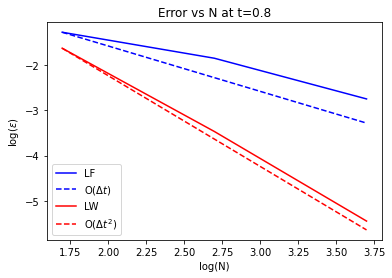

In [88]:
fig, ax = plt.subplots()

ax.set(
    xlabel='log(N)',
    ylabel='log($\epsilon$)',
    title ='Error vs N at t=0.8'
)
ax.plot(np.log10(N), np.log10(LF_errors), '-b', label='LF')
ax.plot(np.log10(N), np.log10(LF_errors[0]*(N/N[0])**(-1)), '--b', label='O($\Delta t$)')
ax.plot(np.log10(N), np.log10(LW_errors), '-r', label='LW')
ax.plot(np.log10(N), np.log10(LW_errors[0]*(N/N[0])**(-2)), '--r', label='O($\Delta t^2$)')
ax.legend()